In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
G = 6.67e-11
Rv = 6.792e6
g = 9.8
t_ff = (np.pi/2)*np.sqrt(Rv/(2.8*g))
print('Free fall time: ' +format(t_ff, '.2E') +' seconds')

Free fall time: 7.81E+02 seconds


In [3]:
M_s = [8, 30]
L_o = 3.828e26
o = 5.67e-8
R_o = 6.957e8
T_eff = [((2600 *L_o)/(4 *np.pi *(4.1 *R_o)**2 *o))**0.25 *(m/8)**0.45 for m in M_s]
print('Temperature 1: ' +format(T_eff[0], '.2E') +' K')
print('Temperature 2: ' +format(T_eff[1], '.2E') +' K')

Temperature 1: 2.04E+04 K
Temperature 2: 3.69E+04 K


In [4]:
wavl = np.linspace(10, 100000, 100000)
# NP Wavelength range in Angstroms
h = 6.63e-34
k = 1.38e-23
c = 3e8
B_l = [((2 *h *c**2 *10**43)/((wavl)**5)) *(1/(np.exp(h *c *10**10/\
    ((wavl) *k *t))-1)) for t in T_eff]
# NP Units of erg s^-1 cm^-2 A^-1 sr^-1

Fraction beyond Lyman limit: 0.046
Fraction beyond Lyman limit: 0.354


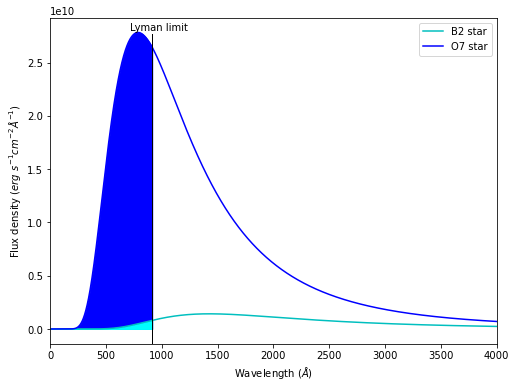

In [5]:
ily = wavl < 914
plt.figure(figsize = [8, 6])
plt.plot(wavl, B_l[0], 'c', label = 'B2 star')
plt.plot(wavl, B_l[1], 'b', label = 'O7 star')
plt.fill_between(wavl[ily], y1 = B_l[1][ily], y2 = 0, color = 'blue')
plt.fill_between(wavl[ily], y1 = (B_l[0][ily]), y2 = 0, color = 'cyan')
plt.axvline(x = 914, ymin = 0.00, ymax = 0.95, color = 'k', lw = 1)
plt.text(914-200, 2.8e10, 'Lyman limit')
plt.xlim(0, 4000)
plt.legend()
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Flux density ($erg$ $s^{-1}cm^{-2}\AA^{-1}$)')
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/OandBstarUV.png')
print('Fraction beyond Lyman limit: ' +\
    str(np.round(np.trapz(B_l[0][ily], wavl[ily])/np.trapz(B_l[0], wavl), 3)))
print('Fraction beyond Lyman limit: ' +\
    str(np.round(np.trapz(B_l[1][ily], wavl[ily])/np.trapz(B_l[1], wavl), 3)))

In [33]:
R_s = [4.1*(m/8)**0.6 *R_o *1e2 for m in M_s]
N = [np.trapz((B_l[i][ily])/(6.63*10**-34 *3e8 *10**10/wavl[ily]),\
    wavl[ily])*10**-7 *4*np.pi*R_s[i]**2 for i in range(len(B_l))]
print('Ionizing photon rate: ' +format(N[0], '.2E') +' ph/s')
print('Ionizing photon rate: ' +format(N[1], '.2E') +' ph/s')

Ionizing photon rate: 5.79E+45 ph/s
Ionizing photon rate: 2.03E+48 ph/s


In [34]:
nstars = [22, 1]
Ntot = [nstars[i] *N[i] for i in range(len(N))]
print('Total ionizing photon rate: ' +format(Ntot[0], '.2E') +' ph/s')
print('Total ionizing photon rate: ' +format(Ntot[1], '.2E') +' ph/s')

Total ionizing photon rate: 1.27E+47 ph/s
Total ionizing photon rate: 2.03E+48 ph/s


In [35]:
nH = 10
alpha_R = 3e-13
R_strom = [((3 *n)/(4 *np.pi *alpha_R *nH**2))**(1/3) for n in Ntot]
print('Stromgren radius: ' +format(R_strom[0], '.2E') +' cm')
print('Stromgren radius: ' +format(R_strom[1], '.2E') +' cm')

Stromgren radius: 1.00E+19 cm
Stromgren radius: 2.53E+19 cm


In [45]:
M_o = 2e30
DM = 0.3 *M_o
R_tstar = 1.5 *R_o
t_kh = (M_o *DM *G)/(R_tstar *L_o)
print('T Tauri disk lifetime: ' +format(t_kh/(np.pi*10**13), '.2E')\
    +' Myr')

T Tauri disk lifetime: 6.38E+00 Myr


In [51]:
dmdt = DM/t_kh
print('dm/dt = ' +format(dmdt *np.pi *10**7/M_o, '.2E') +' M_o yr^-1')

dm/dt = 4.70E-08 M_o yr^-1


In [266]:
R_tauridiff = [R_tstar, 3*R_tstar]
T = [((G*M_o)/(np.pi *5.67e-8) *dmdt *1/(r**3))**0.25 for r in R_tauridiff]
print('Temp. at boundary: ' +format(T[0], '.2E') +' K')
print('Temp. at 3R_*: ' +format(T[1], '.2E') +' K')
T_effstar = (L_o/(4 *np.pi *(1.5 *5.67e-8 *(1.5 *R_o)**2)))**0.25
print('T_eff: ' +format(T_effstar, '.2E') +' K')
print('Ratio at boundary: ' +format(T[0]/T_effstar, '.2E'))
print('Ratio at 3R_*: ' +format(T[1]/T_effstar, '.2E'))

Temp. at boundary: 6.67E+03 K
Temp. at 3R_*: 2.92E+03 K
T_eff: 4.26E+03 K
Ratio at boundary: 1.57E+00
Ratio at 3R_*: 6.87E-01


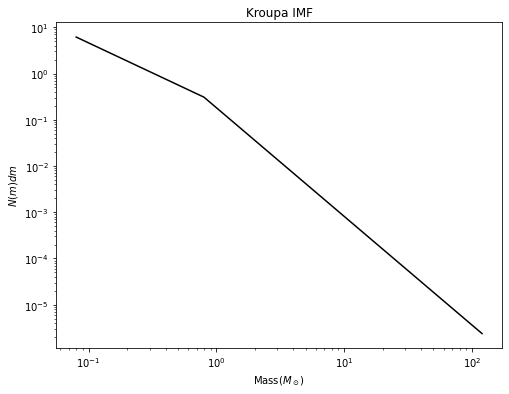

In [147]:
Ms = np.linspace(0.08, 120, 10000)
ilow = Ms < 0.8
ihigh = Ms >= .8
N_low = (Ms[ilow]/.8)**-1.3
N_high = (Ms[ihigh]/.8)**-2.35
N_mdm = np.concatenate((N_low, N_high))
plt.figure(figsize=[8,6])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Mass($M_\odot$)')
plt.ylabel(r'$N(m)dm$')
plt.title('Kroupa IMF')
normalnmdm = (N_mdm)/(np.trapz(N_mdm, Ms))
plt.plot(Ms, normalnmdm, 'k')
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/Kroupa.png')

In [148]:
mdwarf = (Ms >= 0.08) & (Ms < 0.55)
print('Fraction of M dwarfs: ' +format(np.trapz(normalnmdm[mdwarf],\
    Ms[mdwarf]), '.2E'))

Fraction of M dwarfs: 7.19E-01


In [149]:
collapse = (Ms >= 8)
eB = (Ms > 8) & (Ms < 17)
iO = (Ms > 17)
print('Core-collapse fraction: ' +format(np.trapz(normalnmdm[collapse],\
    Ms[collapse]), '.2E'))
print('Early B fraction: ' +format(np.trapz(normalnmdm[eB], Ms[eB]),\
    '.2E'))
print('O fraction: ' +format(np.trapz(normalnmdm[iO], Ms[iO]), '.2E'))

Core-collapse fraction: 7.92E-03
Early B fraction: 5.19E-03
O fraction: 2.73E-03


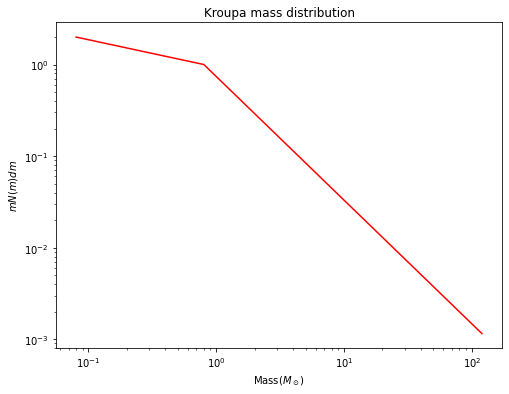

In [159]:
plt.figure(figsize=[8, 6])
MNmdm = (Ms/0.8)*N_mdm
plt.xscale('log')
plt.yscale('log')
MNmdmnorm = MNmdm/np.trapz(MNmdm, Ms)
plt.plot(Ms, MNmdm, 'r')
plt.xlabel(r'Mass($M_\odot$)')
plt.ylabel(r'$mN(m)dm$')
plt.title('Kroupa mass distribution')
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/Kroupamass.png')

In [161]:
tengiga = Ms > 1
print('Mass fraction of stars greater than solar mass: '\
      +format(np.trapz(MNmdmnorm[tengiga], Ms[tengiga]), '.2E'))

Mass fraction of stars greater than solar mass: 6.12E-01


In [169]:
Mbrown = np.linspace(0.013, 120, 10000)
bdwarf = (Mbrown > 0.013) & (Mbrown < 0.55)
print('Brown dwarf mass ratio: ' +format(np.trapz(MNmdmnorm[bdwarf], Mbrown[bdwarf]), '.2E'))

Brown dwarf mass ratio: 2.47E-01


In [189]:
M_03 = pd.read_csv('/d/users/nikhil/Downloads/PISA_0p3Msun.csv')
M_1 = pd.read_csv('/d/users/nikhil/Downloads/PISA_1p0Msun.csv')
M_3 = pd.read_csv('/d/users/nikhil/Downloads/PISA_3p0Msun.csv')
models = [M_03, M_1, M_3]
ages = [m['      logAge'] for m in models]
lum = [m['     logL'] for m in models]
Te = [m['    logTe'] for m in models]
Tc = [m['    logTc'] for m in models]
rhoC = [m['  logrhoC'] for m in models]
Fpp = [m['       Fpp'] for m in models]
Fcno = [m['      Fcno'] for m in models]
Fgra = [m['      Fgra'] for m in models]

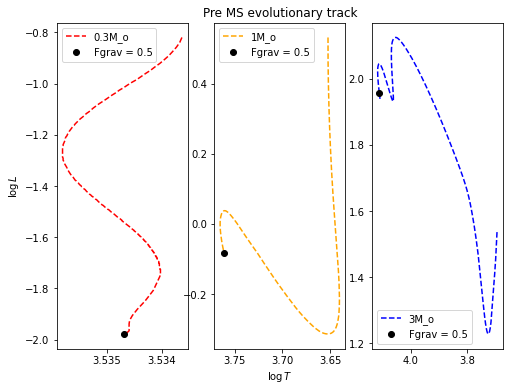

In [324]:
ifg = [np.argmin(f-.5) for f in Fgra]
plt.figure(figsize = [8, 6])
plt.subplot(1, 3, 1)
plt.ylabel(r'$\logL$')
plt.plot(Te[0], lum[0], '--r', label = '0.3M_o')
plt.plot(Te[0][ifg[0]], lum[0][ifg[0]], 'ok', label = 'Fgrav = 0.5')
plt.gca().invert_xaxis()
plt.legend()
plt.subplot(1, 3, 2)
plt.title('Pre MS evolutionary track')
plt.plot(Te[1], lum[1], '--', color = 'orange', label = '1M_o')
plt.plot(Te[1][ifg[1]], lum[1][ifg[1]], 'ok', label = 'Fgrav = 0.5')
plt.gca().invert_xaxis()
plt.xlabel(r'$\logT$')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(Te[2], lum[2], '--b', label = '3M_o')
plt.plot(Te[2][ifg[2]], lum[2][ifg[2]], 'ok', label = 'Fgrav = 0.5')
plt.gca().invert_xaxis()
plt.legend()
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/HRD.png')

In [295]:
ags = [10**(a[0]) for a in ages]
print('Pre-main sequence begins at ' +format(ags[0], '.2E') +' years for 0.3M_o star.')
print('Pre-main sequence begins at ' +format(ags[1], '.2E') +' years for 1M_o star.')
print('Pre-main sequence begins at ' +format(ags[2], '.2E') +' years for 3M_o star.')

Pre-main sequence begins at 3.55E+06 years for 0.3M_o star.
Pre-main sequence begins at 7.07E+05 years for 1M_o star.
Pre-main sequence begins at 2.67E+05 years for 3M_o star.


In [318]:
print('Inital luminosity: ' +format(10**(lum[1][0]), '.2E') +' L_o')
print('Initial T: ' +format(10**(Te[1][0]), '.2E') +' K')
print('Inital radius: ' +format((((10**(lum[1][0]) *L_o)/\
    (4 *np.pi *5.67e-8 *(10**(Te[1][0]))**4))**0.5)/(R_o), '.2E') +' R_o')

Inital luminosity: 3.40E+00 L_o
Initial T: 4.49E+03 K
Inital radius: 3.05E+00 R_o


In [297]:
ags = [10**(a[len(a)-1])-10**(a[0]) for a in ages]
print(format(ags[0], '.2E') +' years spent on pre-main sequence for 0.3M_o star.')
print(format(ags[1], '.2E') +' years spent on pre-main sequence for 1M_o star.')
print(format(ags[2], '.2E') +' years spent on pre-main sequence for 3M_o star.')

5.97E+08 years spent on pre-main sequence for 0.3M_o star.
3.27E+07 years spent on pre-main sequence for 1M_o star.
3.77E+06 years spent on pre-main sequence for 3M_o star.


In [326]:
print('ZAMS luminosity: ' +format(10**(lum[1][len(lum[1])-1]), '.2E') +' L_o')
print('ZAMS T: ' +format(10**(Te[1][len(Te[1])-1]), '.2E') +' K')
print('ZAMS radius: ' +format((((10**(lum[1][len(lum[1])-1]) *L_o)/\
    (4 *np.pi *5.67e-8 *(10**(Te[1][len(Te[1])-1]))**4))**0.5)/(R_o), '.2E') +' R_o')

ZAMS luminosity: 8.26E-01 L_o
ZAMS T: 5.77E+03 K
ZAMS radius: 9.10E-01 R_o
